# Transformation of features

- When our data has various kinds of values which has dirreferent units and hence their is huge difference in those values.

- In certain algorithms we need to deel with this values as follows -
    1. Regression - we gradient descent to get global minima
    2. KNN, KMeans, Hierarchial - we find Euclidean distances.
    
- So in this cases we need to scale down this values so we can easily and quickly operate on this values.

#### Types Of Transformation
1. Normalization And Standardization
2. Scaling to Minimum And Maximum values
3. Scaling To Median And Quantiles
4. Guassian Transformation
  1. Logarithmic Transformation
  2. Reciprocal Trnasformation
  3. Square Root Transformation
  4. Exponential Trnasformation
  5. Box Cox Transformation

In [8]:
# Importing Libraries for ML

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

import warnings
warnings.filterwarnings("ignore")

# Importing Data

df = pd.read_csv('C:/Users/Shubham/Documents/Data Science/Notebooks/00. Data_Store/titanic.csv',usecols=["Survived","Pclass","Age","Fare"])

# Removing Null

df["Age"].fillna(df.Age.median(), inplace=True)

# Splitting Independent and Dependent Feature

x = df.iloc[:, 1:]
y = df.iloc[:,0]

# Splitting Data into Train Test split

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

df.head(3)

,Survived,Pclass,Age,Fare
0,0,3,22.0,7.2500
1,1,1,38.0,71.2833
2,1,3,26.0,7.9250


## 1. Standardization (Why standardization?)

- Standardization comes into picture when features of input data set have large differences between their ranges, or simply when they are measured in different measurement units (e.g., Pounds, Meters, Miles … etc).

- We try to bring all the variables or features to a similar scale. standarisation means centering the variable at zero.

$z = \frac {(X- Xmean)}{Standard Deviation}$

- Standerd Deviation  = 1
- Mean of Data = 0

Standerdization is the process where data is scaled such that Standerd deviation is 1 and mean 0, that means data is simply distributed across 0.

### Difference between **`fit_transform()`** and **`transform()`**

- When we do **fit_transform()** data is fitted to **StanderdScalar object** where **mean**, **Standerd Deviation** required for scaling is finded out from data and used for scaling

- When we do **transform()** then the  **mean**, **Standerd Deviation** are used which calculated in fit method.

- Now we need to use the same  **mean**, **Standerd Deviation** for both the x_train and x_test datas hence we use `fit_transform()` only once and then only `transform()` is used.

In [12]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

x_train_scaled = scaler.fit_transform(x_train)

x_test_scaled = scaler.transform(x_test)

x_train_scaled

array([[-1.62580285,  1.91349292,  0.38784185],
       [ 0.80576177, -0.09452019, -0.31908053],
       [-0.41002054, -0.32621401,  0.18792449],
       ...,
       [ 0.80576177,  0.90948636, -0.34613654],
       [-1.62580285, -1.17575802,  1.71250117],
       [-1.62580285, -0.63513911,  0.8821286 ]])

In [13]:
x_test_scaled

array([[ 0.80576177, -0.09452019, -0.32402243],
       [-0.41002054,  0.13717363, -0.4162854 ],
       [ 0.80576177, -0.71237038, -0.46634591],
       [-0.41002054, -1.79360821,  0.0211365 ],
       [ 0.80576177, -1.17575802, -0.40186603],
       [-1.62580285, -0.24898274,  0.91250512],
       [ 0.80576177, -0.09452019, -0.46974808],
       [ 0.80576177, -1.02129548, -0.2704781 ],
       [ 0.80576177, -1.02129548, -0.46974808],
       [-1.62580285, -0.78960166, -0.10944269],
       [-1.62580285,  0.60056127,  0.41190006],
       [ 0.80576177,  1.14118018, -0.46391578],
       [ 0.80576177, -0.09452019, -0.12531819],
       [ 0.80576177,  0.05994235, -0.47995459],
       [-0.41002054,  0.52332999, -0.36768297],
       [-1.62580285, -1.02129548,  0.14555873],
       [-1.62580285,  0.98671764,  0.40128918],
       [ 0.80576177, -0.09452019, -0.46820835],
       [-0.41002054, -0.17175147, -0.36768297],
       [-1.62580285,  1.372874  ,  0.39051499],
       [ 0.80576177, -0.40344529, -0.466

## 2. Min-Max Scaling 
- It is used to scale down the values between 0-1.
- It is extensively used in CNN for images as pixel values are in 0-255 it scales down them to 0-1.
- Min Max Scaling scales the values between 0 to 1. hence in binary classification we can directly apply it on DataFrame containing Target data also as it will not effect 0 and 1 only values in it.

$ Xscaled = \frac {X - X.min} {Xmax - Xmin}$


In [16]:
from sklearn.preprocessing import MinMaxScaler

min_max=MinMaxScaler()

df_mm_scaled = min_max.fit_transform(df)

df_mm_scaled

array([[0.        , 1.        , 0.27117366, 0.01415106],
       [1.        , 0.        , 0.4722292 , 0.13913574],
       [1.        , 1.        , 0.32143755, 0.01546857],
       ...,
       [0.        , 1.        , 0.34656949, 0.04577135],
       [1.        , 0.        , 0.32143755, 0.0585561 ],
       [0.        , 1.        , 0.39683338, 0.01512699]])

## 3. Robust Scaler

- Robust Scaler are robust to outliers.It is used to scale the feature to median and quantiles

- Scaling using median and quantiles consists of substracting the median to all the observations, and then dividing by the interquantile difference. The interquantile difference is the difference between the 75th and 25th quantile:

$IQR = 75_{th} quantile - 25_{th} quantile$

$ Xscaled = \frac{X - Xmedian}{IQR}$

quantile is the percentile in the boxplot

In [17]:
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()

df_robust_scaler_train = scaler.fit_transform(x_train)

df_robust_scaler_test = scaler.transform(x_test)

In [20]:
df_robust_scaler_train

array([[-2.        ,  2.        ,  1.60206852],
       [ 0.        ,  0.        ,  0.04478801],
       [-1.        , -0.23076923,  1.16167024],
       ...,
       [ 0.        ,  1.        , -0.0148137 ],
       [-2.        , -1.07692308,  4.52016274],
       [-2.        , -0.53846154,  2.69093362]])

In [21]:
df_robust_scaler_train

array([[-2.        ,  2.        ,  1.60206852],
       [ 0.        ,  0.        ,  0.04478801],
       [-1.        , -0.23076923,  1.16167024],
       ...,
       [ 0.        ,  1.        , -0.0148137 ],
       [-2.        , -1.07692308,  4.52016274],
       [-2.        , -0.53846154,  2.69093362]])

### It is basically used to handle the outliers

## 4. Guassian Transformation

Some machine learning algorithms like linear and logistic and unlike ensemble algorithms, assume that the features are normally distributed and these some of the algorithms works well on Gaussian Distributed data.
- Accuracy
- Performance
- logarithmic transformation
- reciprocal transformation
- square root transformation
- exponential transformation (more general, you can use any exponent)
- boxcox transformation

From above Methods we need to find out which method gives the best results in terms of gaussian transformation i.e. the method that gives us Normal distribution is selected but we need to check out for every one of them.

In [23]:
df.head(3)

,Survived,Pclass,Age,Fare
0,0,3,22.0,7.2500
1,1,1,38.0,71.2833
2,1,3,26.0,7.9250


Q-Q plot is used to see the Normal Distribution or not

It is given with the help of **scipy.stats** module and probplot() method with `dist='norm'` which gives the plot such that if datapoints are in straight line it is assummed as Normally distributed.

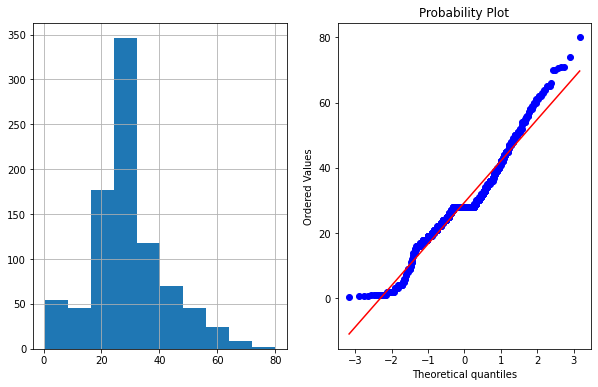

In [39]:
import scipy.stats as stat
import pylab 

def plot_data(df,feature):
    
    plt.figure(figsize=(10,6))
    plt.subplot(1,2,1)
    df[feature].hist()
    
    plt.subplot(1,2,2)
    stat.probplot(df[feature],dist='norm',plot=pylab)
    plt.show()
    
plot_data(df, "Age")

### 1. Logarithmic Transformation

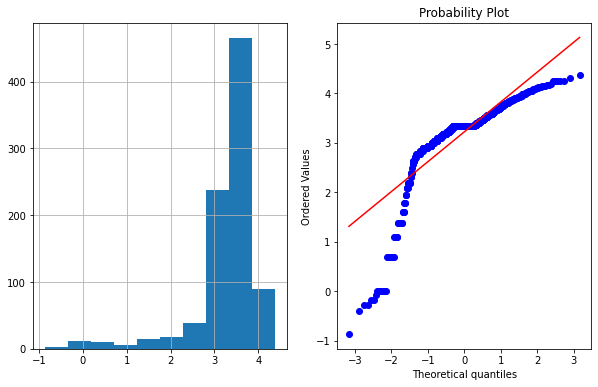

In [28]:
df['Age_log'] = np.log(df['Age'])

plot_data(df, 'Age_log')

### 2. Reciprocal Trnasformation

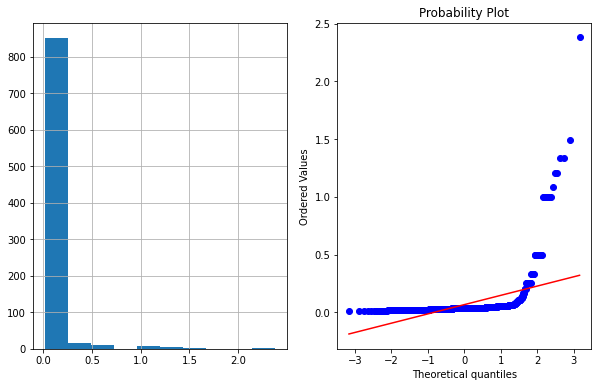

In [30]:
df['Age_reciprocal'] = 1/df.Age

plot_data(df,'Age_reciprocal')

### 3. Square Root Transformation

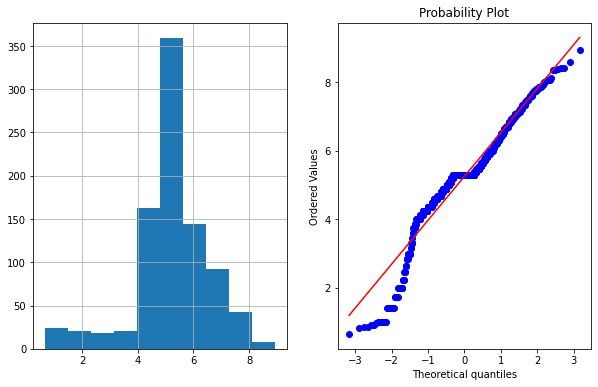

In [40]:
df['Age_sqaure'] = df["Age"]**(1/2)

plot_data(df,'Age_sqaure')

### 4. Exponential Transdormation

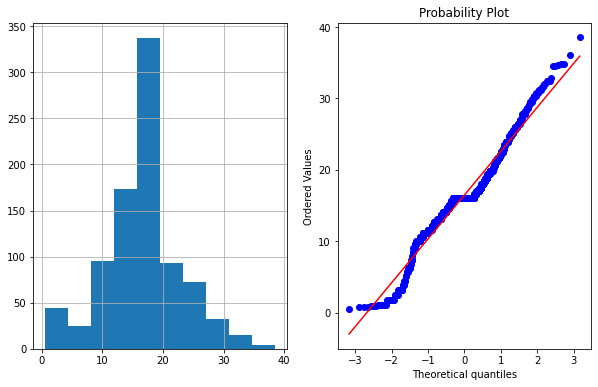

In [34]:
df['Age_exponential'] = df["Age"]**(1/1.2)

plot_data(df,'Age_exponential')

### 5. BoxCox Transformation

The Box-Cox transformation is defined as: 

T(Y) $=\frac{(Y exp(λ)−1)}{λ}$

where Y is the response variable and λ is the transformation parameter. λ varies from -5 to 5. In the transformation, all values of λ  are considered and the optimal value for a given variable is selected.

In [36]:
df['Age_Boxcox'], parameters = stat.boxcox(df['Age'])

print(parameters)

0.7964531473656952


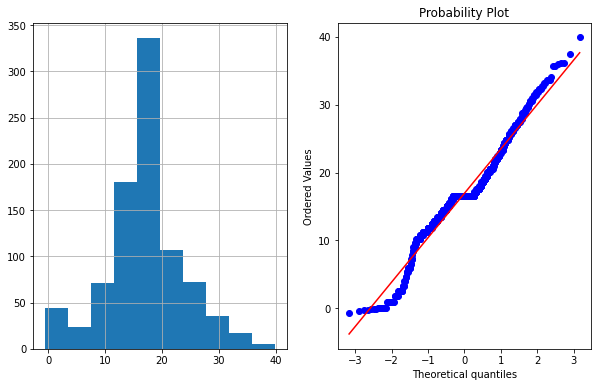

In [37]:
plot_data(df,'Age_Boxcox')